EDA

Now that our data is clean we will start to explore it

In [20]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# loading csv file
df = pd.read_csv('total_houses.csv')
df.head()

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
0,5650000.0,314.0,286.0,4.0,5.0,2.0,JURIQUILLA
1,1595000.0,69.0,0.0,3.0,1.0,1.0,CIUDAD DEL SOL
2,11190000.0,370.0,0.0,4.0,4.0,3.0,ALTOZANO
3,790000.0,195.0,150.0,3.0,3.0,2.0,LA JOYA
4,849000.0,400.0,400.0,5.0,4.0,4.0,JURIQUILLA


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           864 non-null    float64
 1   Total_Area_m^2  864 non-null    float64
 2   Built_Area_m^2  864 non-null    float64
 3   Bedrooms        864 non-null    float64
 4   Bathrooms       864 non-null    float64
 5   Parking         864 non-null    float64
 6   Neighborhood    864 non-null    object 
dtypes: float64(6), object(1)
memory usage: 47.4+ KB


In [23]:
# sorting values in ascending order by column Price
# Esto modifica el DataFrame 'df' directamente
#df = df.sort_values(by='Price', ascending=True)
#df.head(20)

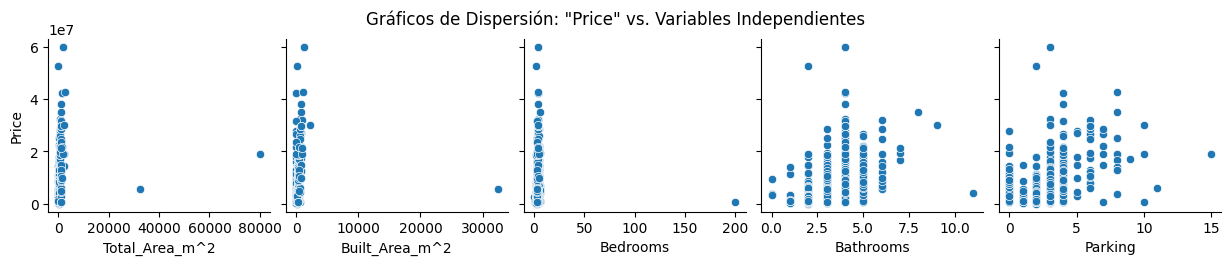

In [24]:

# 3. Usar pairplot para graficar solo la primera fila
sns.pairplot(
    data=df,
    y_vars=['Price'],          # Lista con UNA SOLA variable (la dependiente)
    x_vars=['Total_Area_m^2',	'Built_Area_m^2',	'Bedrooms',	'Bathrooms',	'Parking']	,        # Lista con MÚLTIPLES variables (las independientes)
    kind='scatter'
)

plt.suptitle(f'Gráficos de Dispersión: "Price" vs. Variables Independientes', y=1.02)
plt.show()

We wanted to see the relation between dependent varibale with independence variables, and we identified:
* outliers in columns as "Built_Area_m^2"
* weird values as houses with cero bathrooms

We have to check each of the variables:

Column "Total_Area_m^2":
* We don't see a linear relation
* We see at least two outliers, higher than 20,000 m^2

Column "Built_Area_m^2":
* We don't see a linear relation
* We see one outlier, higher than 10,000 m^2

Column "Bedrooms":
* We don't see a linear relation
* We see one outlier, is almost impossible a house with 200 bedrooms

Column "Bedrooms":
* We don't see a linear relation
* We see one outlier, is almost impossible a house with 200 bedrooms

Column "Bathrooms":
* We see some houses without bathrooms, we have to check this cases and maybe perform an imputation
* We see a house with more than 10 bathrooms, we have to check the size of this house

Column "Parking":
* We see some houses without bathrooms, we have to check this cases and maybe perform an imputation
* We see a house with more than 10 bathrooms, we have to check the size of this house

In [25]:
#df.sort_values(by='Total_Area_m^2', ascending=True).tail()


delete values upper 30000

In [26]:
#df = df[df['Total_Area_m^2']<30000]

In [27]:
#df.sort_values(by='Built_Area_m^2', ascending=True).tail()

Not requiered delete more values

In [28]:
#df.sort_values(by='Bedrooms', ascending=True).tail()

delete this house with more than 200 hundred houses

In [29]:
#df = df[df['Bedrooms']<200]

In [30]:
# function to plod Histogram and Boxplot
def hist_boxplot(df,column):
    # Gettin central tendency measures
    #column = 'Price'  # cambia por la columna que te interese
    
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode()
    std = df[column].std()

    # Crear figura con dos gráficos (histograma y boxplot)
    plt.figure(figsize=(12, 6))

    # ---------- HISTOGRAMA ----------
    plt.subplot(2, 1, 1)
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

    # Agregamos las líneas de tendencia central
    plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='purple', linestyle='--', linewidth=2, label=f'Mode: {mode:.2f}')

    
    # Grid (rejilla)
    plt.grid(True, linestyle=':', alpha=0.7)
    
    # Detalles del gráfico
    plt.title(f'{column} histogram')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.axvline(mean, color='red', linestyle='--', linewidth=2, label='Media')
    plt.axvline(median, color='green', linestyle='--', linewidth=2, label='Mediana')
    plt.axvline(mode, color='purple', linestyle='--', linewidth=2, label='Moda')
    plt.xlabel(column)

    # Grid (rejilla)
    plt.grid(True, linestyle=':', alpha=0.7)

    plt.title(f'Boxplot de {column}')
    plt.legend()

    print((std/mean)*100)

    plt.tight_layout()
    plt.show()

* We can see a skewd distibution to the left
* There are outliers, houses with a cost of more than 15 millions, 
* Mean is $6,374,496, but this is very sensitive to outliers
* Median is $4,269,800, 2 millions of difference with Mean

In [ ]:
# deleting houses with a higher price than 15,000,000

#max_whisker = df['Price'].quantile(0.75) + (1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25)))
#print(max_whisker)
#df = df[df['Price']<max_whisker]

16452785.25


625.5559464998023


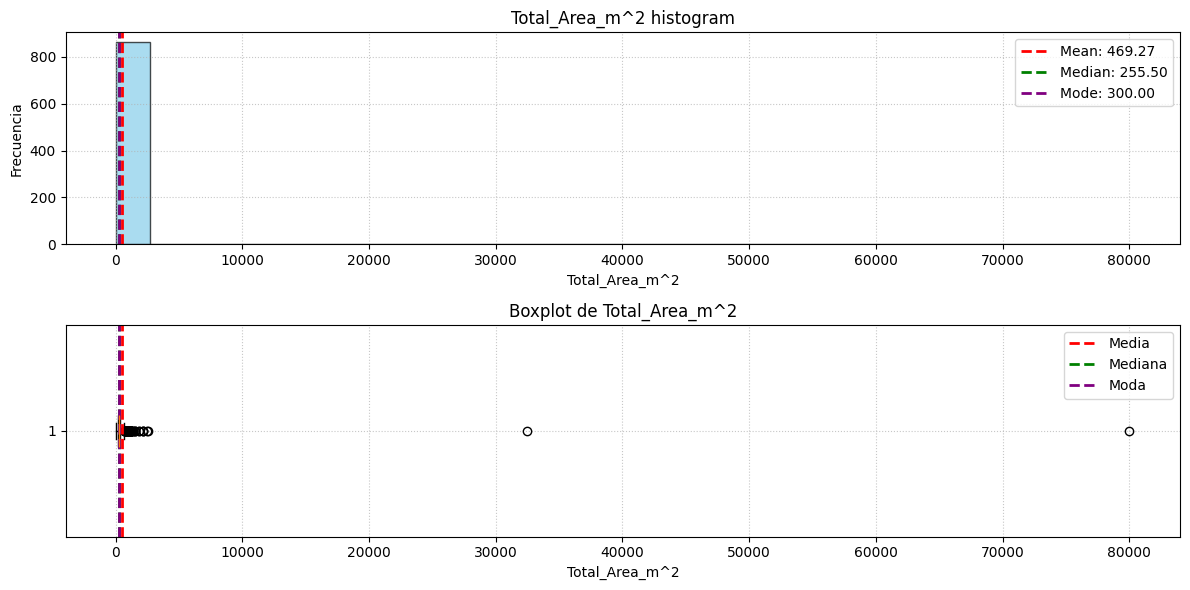

In [ ]:
# Histogran and boxplot of an independent variable
hist_boxplot(df,'Total_Area_m^2')

We can see two outliers: lets see the values:

In [37]:
df[df['Total_Area_m^2']>30000]

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
830,19000000.0,80000.0,1.0,3.0,2.0,15.0,CENTRO
861,5700000.0,32437.0,32437.0,3.0,3.0,4.0,FRAY JUNIPERO SERRA


We will delete two properties

86.97827931065396


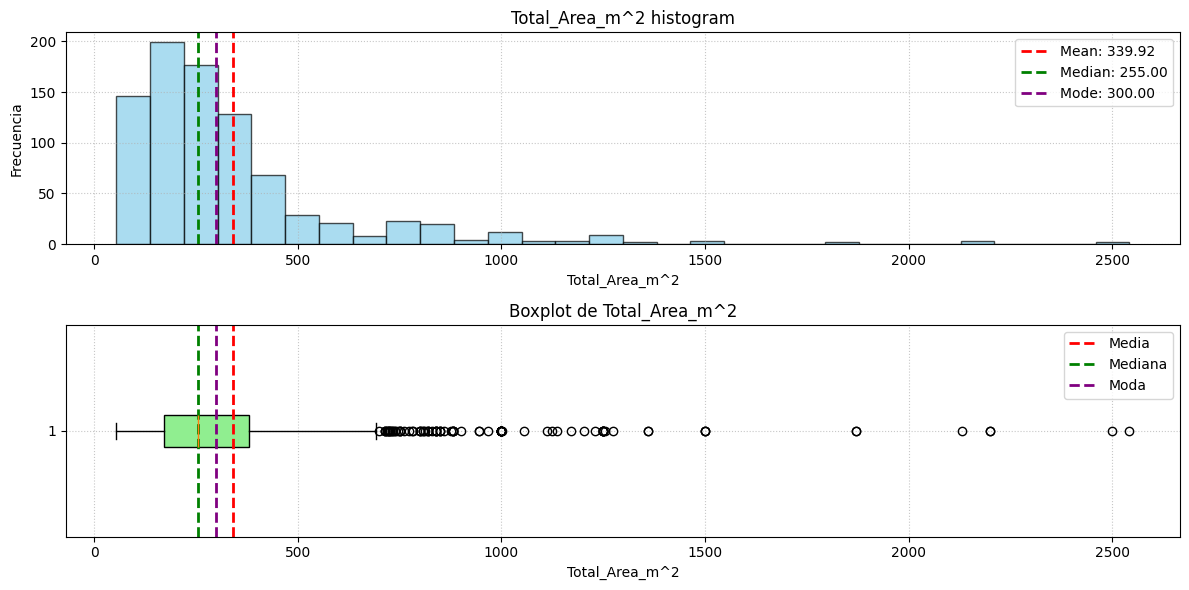

In [40]:
df = df[df['Total_Area_m^2']<30000]
# Histogran and boxplot of an independent variable
hist_boxplot(df,'Total_Area_m^2')

86.97827931065396


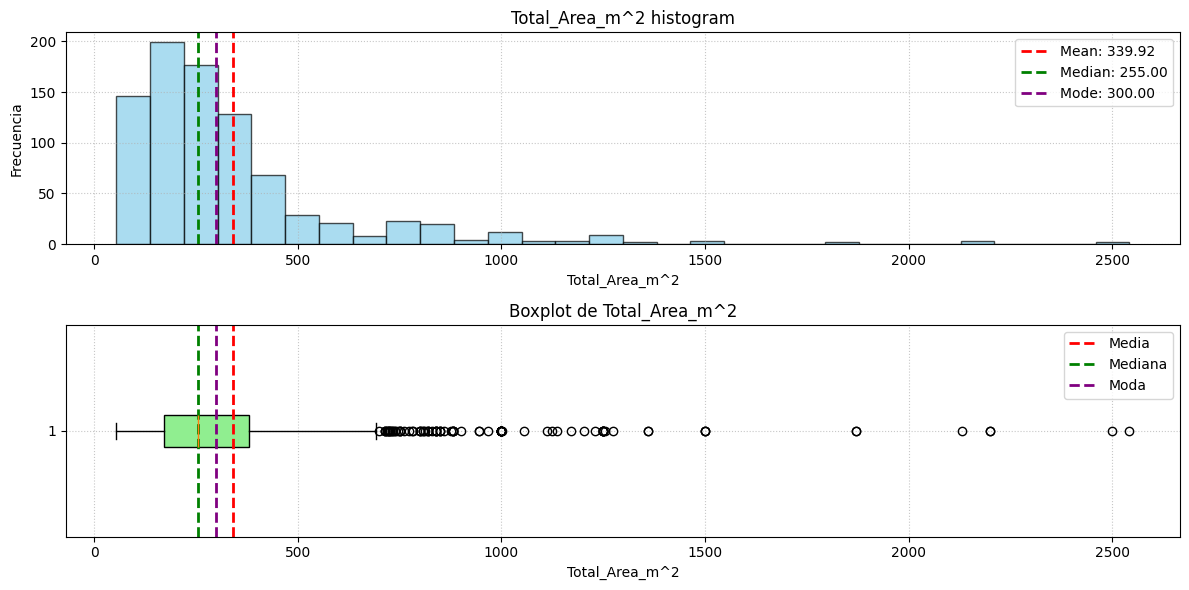

In [39]:
hist_boxplot(df,'Total_Area_m^2')

In [34]:
# deleting houses with a higher price than max whisker
max_whisker = df['Total_Area_m^2'].quantile(0.75) + (1.5 * (df['Total_Area_m^2'].quantile(0.75) - df['Total_Area_m^2'].quantile(0.25)))
print(max_whisker)
df = df[df['Total_Area_m^2']<max_whisker]

635.0


55.688827619087334


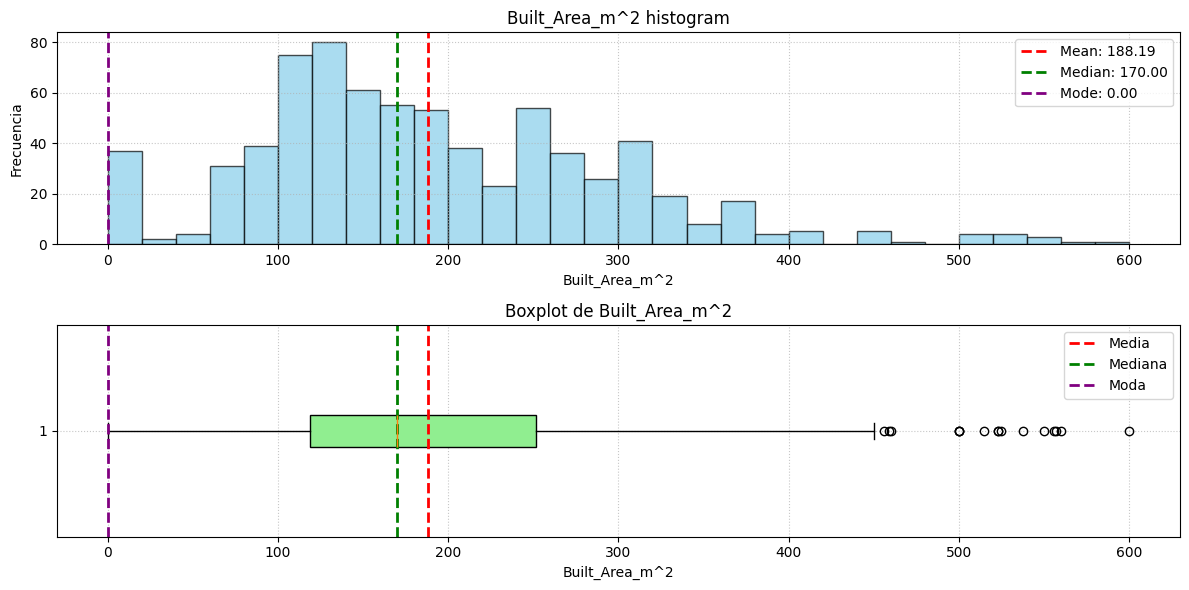

In [48]:
hist_boxplot(df,'Built_Area_m^2')
#'',	'^2',	'Bedrooms',	'Bathrooms',	'Parking'

# deleting houses with a higher price than max whisker
max_whisker = df['Built_Area_m^2'].quantile(0.75) + (1.5 * (df['Built_Area_m^2'].quantile(0.75) - df['Built_Area_m^2'].quantile(0.25)))
print(max_whisker)
df = df[df['Built_Area_m^2']<max_whisker]

202.00604324958456


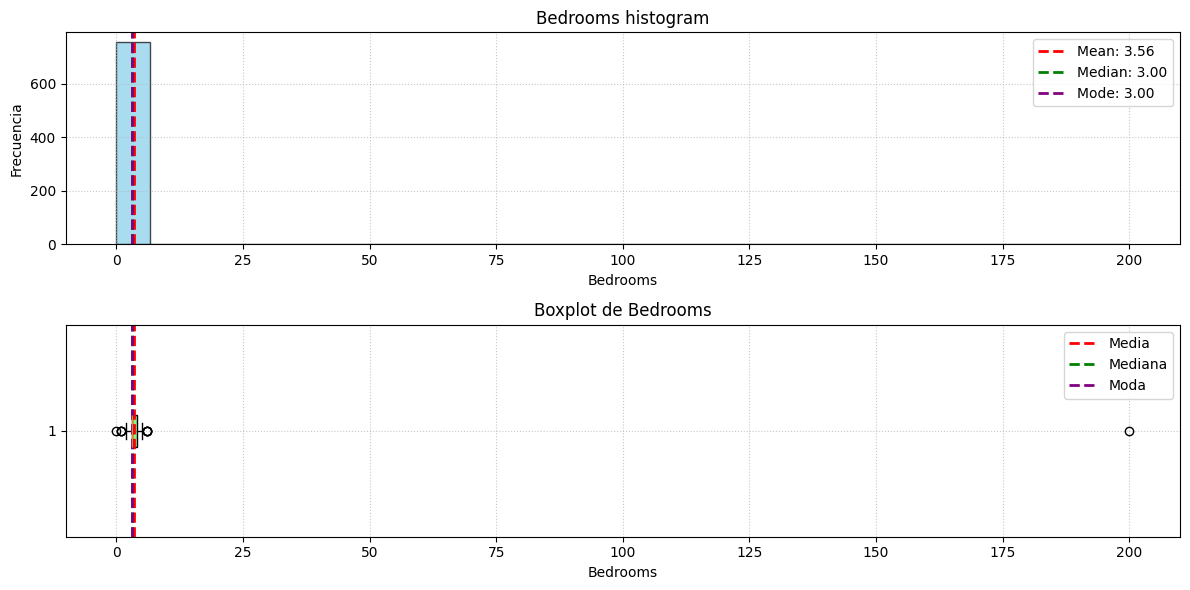

In [36]:
hist_boxplot(df,'Bedrooms')
#'',	'^2',	'',	'Bathrooms',	'Parking'

In [37]:
# deleting houses with a higher price than max whisker
max_whisker = df['Bedrooms'].quantile(0.75) + (1.5 * (df['Bedrooms'].quantile(0.75) - df['Bedrooms'].quantile(0.25)))
print(max_whisker)
df = df[df['Bedrooms']<max_whisker]

5.5


39.27269139107285


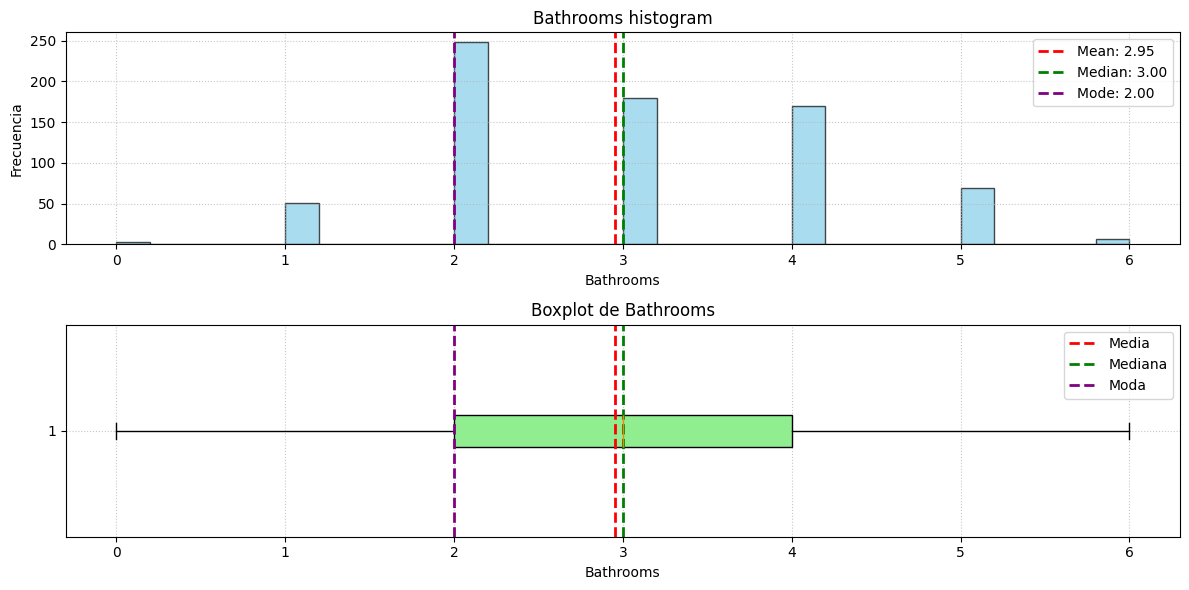

In [49]:
hist_boxplot(df,'Bathrooms')
#'',	'^2',	'',	'',	'Parking'

In [39]:
# deleting houses with a higher price than max whisker
max_whisker = df['Bathrooms'].quantile(0.75) + (1.5 * (df['Bathrooms'].quantile(0.75) - df['Bathrooms'].quantile(0.25)))
print(max_whisker)
df = df[df['Bathrooms']<max_whisker]

7.0


42.075303859189326


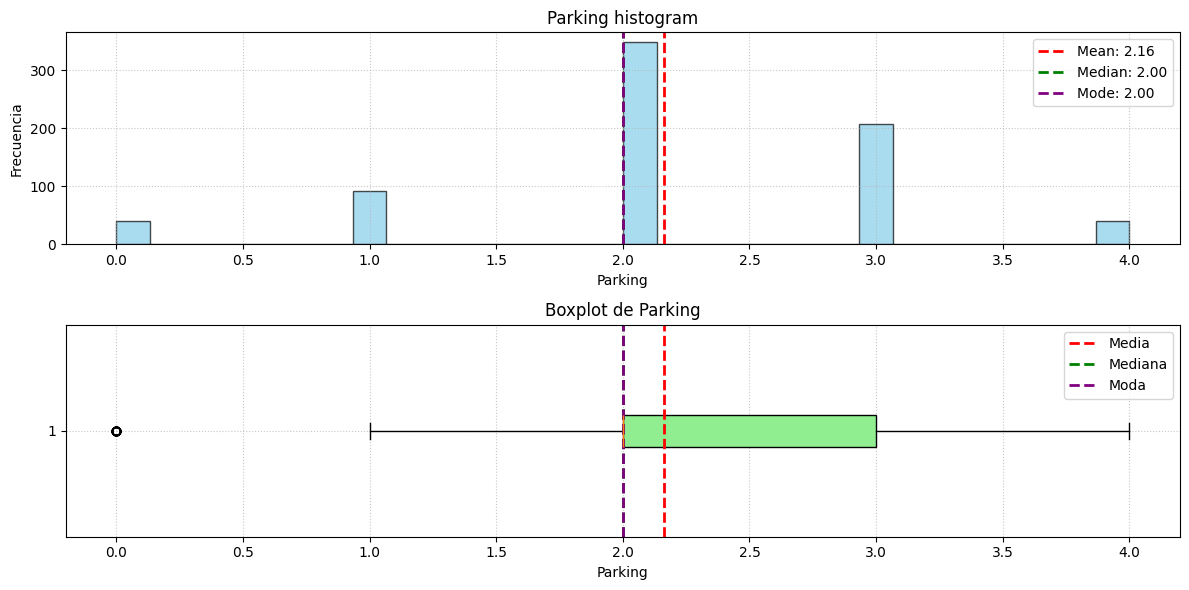

In [50]:
hist_boxplot(df,'Parking')

In [41]:
# deleting houses with a higher price than max whisker
max_whisker = df['Parking'].quantile(0.75) + (1.5 * (df['Parking'].quantile(0.75) - df['Parking'].quantile(0.25)))
print(max_whisker)
df = df[df['Parking']<max_whisker]

4.5


In [14]:
df = df[df['Price']<16000000]

71.30586913525539


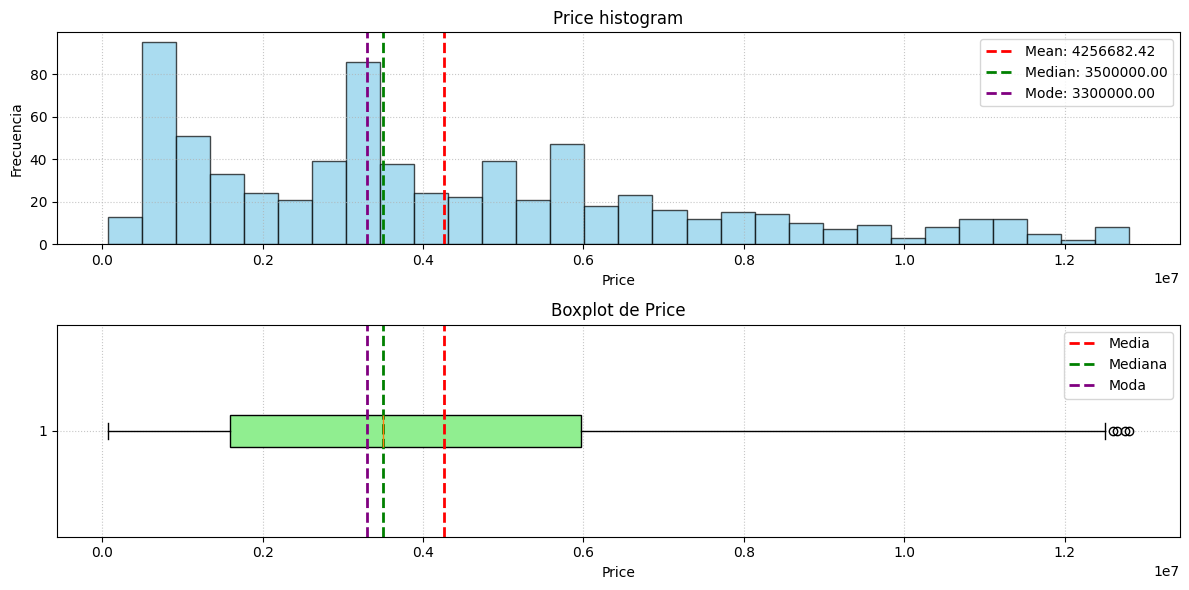

In [51]:
hist_boxplot(df,'Price')

In [16]:

df = df[df['Price']<13000000]

71.30586913525539


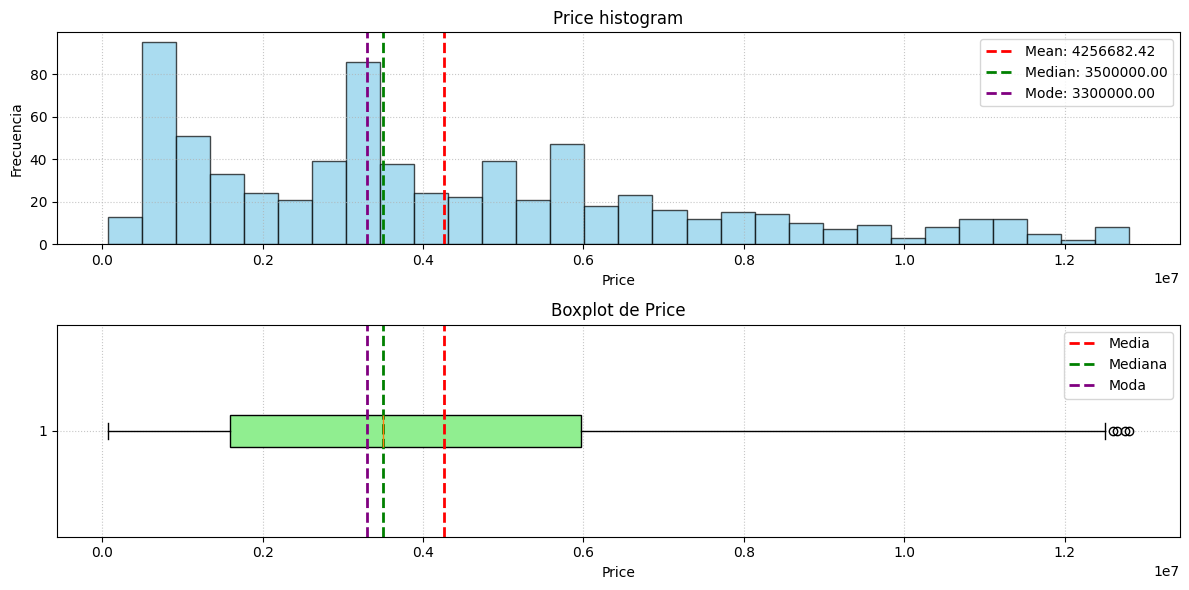

In [52]:
hist_boxplot(df,'Price')

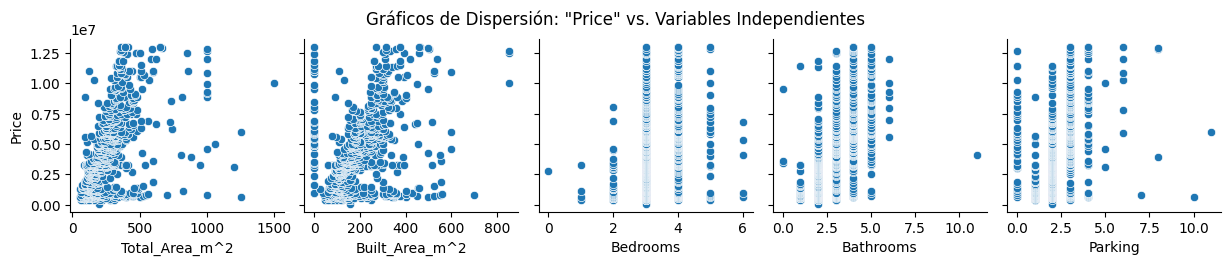

In [18]:

# 3. Usar pairplot para graficar solo la primera fila
sns.pairplot(
    data=df,
    y_vars=['Price'],          # Lista con UNA SOLA variable (la dependiente)
    x_vars=['Total_Area_m^2',	'Built_Area_m^2',	'Bedrooms',	'Bathrooms',	'Parking']	,        # Lista con MÚLTIPLES variables (las independientes)
    kind='scatter'
)

plt.suptitle(f'Gráficos de Dispersión: "Price" vs. Variables Independientes', y=1.02)
plt.show()

In [19]:
df[df['Built_Area_m^2']==0]

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
319,975000.0,126.0,0.0,3.0,2.0,2.0,OBRERA
309,980000.0,354.0,0.0,4.0,3.0,0.0,REAL DE JURIQUILLA
1,1595000.0,69.0,0.0,3.0,1.0,1.0,CIUDAD DEL SOL
483,1600000.0,146.0,0.0,3.0,1.0,2.0,SONTERRA
202,2340000.0,126.0,0.0,3.0,2.0,2.0,JURIQUILLA
356,3050000.0,133.0,0.0,3.0,2.0,2.0,JURIQUILLA
330,3300000.0,146.0,0.0,3.0,2.0,2.0,CUMBRES DEL LAGO
725,3440000.0,217.0,0.0,3.0,4.0,2.0,EL REFUGIO
292,3500000.0,190.0,0.0,3.0,2.0,3.0,EL REFUGIO
370,3550000.0,191.0,0.0,3.0,2.0,2.0,JURIQUILLA


In [20]:
df[df['Bedrooms']==0]

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
290,2750000.0,291.18,91.69,0.0,1.0,2.0,JURIQUILLA


In [21]:
df[df['Bathrooms']==0]

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
548,3450000.0,153.0,153.0,3.0,0.0,2.0,EL CAMPANARIO
470,3600000.0,151.0,140.0,3.0,0.0,2.0,REAL DE JURIQUILLA
667,9500000.0,280.0,0.0,3.0,0.0,4.0,EL REFUGIO


In [22]:
df.shape

(769, 7)

In [17]:
# 1. Calcular los cuartiles

Q1 = df['Price'].quantile(0.25)

Q3 = df['Price'].quantile(0.75)# 2. Calcular el Rango Intercuartílico (IQR)

IQR = Q3 - Q1



print(f"Q1 (Primer Cuartil): {Q1:.2f}")

print(f"Q3 (Tercer Cuartil): {Q3:.2f}")

print(f"Rango Intercuartílico (IQR): {IQR:.2f}")



# 3. Calcular los límites teóricos de los bigotes

limite_inferior = Q1 - (1.5 * IQR)

limite_superior = Q3 + (1.5 * IQR)#     

print(limite_superior)
print(df['Price'].quantile(0.75) + (1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25))))

Q1 (Primer Cuartil): 2052351.50
Q3 (Tercer Cuartil): 7812525.00
Rango Intercuartílico (IQR): 5760173.50
16452785.25
16452785.25


In [24]:
# deleting houses with a higher price than 15,000,000

max_whisker = df['Price'].quantile(0.75) + (1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25)))
print(max_whisker)
df = df[df['Price']<max_whisker]

13062500.0


In [25]:
df['Price'].value_counts()

Price
3300000.0     47
849000.0      13
4750000.0      8
3400000.0      7
3500000.0      7
              ..
1960000.0      1
1946320.0      1
1930000.0      1
1869000.0      1
12990000.0     1
Name: count, Length: 425, dtype: int64

In [26]:
df['Price'].min()

72680.0

In [27]:
df[df['Price']<1000000]

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
631,72680.0,195.0,158.0,3.0,2.0,2.0,JURICA
300,350000.0,222.0,162.0,3.0,3.0,3.0,CENTRO
249,350000.0,157.0,152.0,2.0,2.0,2.0,HIDALGO
287,351000.0,80.0,65.0,1.0,1.0,1.0,PASEOS DEL PEDREGAL
220,351000.0,280.0,123.0,5.0,3.0,1.0,VILLAS DEL MESON
...,...,...,...,...,...,...,...
773,987000.0,183.0,140.0,3.0,3.0,2.0,MILENIO III
789,990000.0,275.0,150.0,4.0,3.0,3.0,SAN MIGUEL
303,990000.0,108.0,37.0,2.0,1.0,1.0,REAL DE JURIQUILLA
344,990000.0,105.0,95.0,3.0,1.0,2.0,EL MARQUES


graficaos un boxpplot de la variable dependiente y vimos varios outliers, tratamos de eliminarlos pero despues al volder a hacer un boxplot donde habia una nuevo IQR y una nueva distribucion apareciendo nuevos outliers.

No era buena idea eliminar outliers de manera iterativa ya que podiamos perder informacion valiosa, asi que cambiamos el enfoque

Eliminar outliers de forma iterativa puede ser peligroso, ya que podrías terminar eliminando datos válidos o distorsionando la distribución original. 

* Entiender la naturaleza de los datos y el contexto  Por qué: No todos los outliers son errores; algunos pueden ser casos reales y valiosos (por ejemplo, ingresos altos en un dataset financiero).  
Qué hacer:  Revisa si los outliers tienen sentido en el contexto de tu problema. Pregúntate:  ¿Son errores de medición o entrada de datos?  
¿Representan casos extremos pero válidos (por ejemplo, un cliente con gastos inusualmente altos)?

* Usa una sola pasada con el método IQR (o alternativa) para identificar outliers  Por qué: Aplicar el método IQR iterativamente cambia los límites de detección en cada iteración, lo que puede llevar a eliminar demasiados datos. Una sola pasada es más conservadora.  
* Evalúa el impacto de los outliers en tu modelo  Por qué: En regresión lineal, los outliers pueden influir significativamente en la pendiente de la recta, pero no siempre es necesario eliminarlos.  
Qué hacer:  Entrena un modelo de regresión lineal con y sin los outliers y compara métricas (como R², RMSE).  
Usa visualizaciones como un gráfico de dispersión para ver si los outliers distorsionan la relación lineal.  
Considera métodos robustos a outliers, como regresión robusta (HuberRegressor en scikit-learn), en lugar de eliminarlos.
Usar modelos robustos

En lugar de la regresión lineal clásica, usa métodos menos sensibles a valores extremos:

Regresión robusta (HuberRegressor o RANSACRegressor de sklearn)

Regresión sobre logaritmos (si los salarios tienen una distribución muy asimétrica)

* Revisa la distribución: Si tus datos son muy asimétricos (por ejemplo, sesgados a la derecha), los outliers seguirán apareciendo en boxplots. Usa transformaciones como logaritmos o raíces cuadradas antes de aplicar IQR.  
Prueba modelos robustos: Si los outliers son válidos pero afectan la regresión lineal, considera modelos como HuberRegressor que son menos sensibles a outliers.  

* Valida tus decisiones con visualizaciones y pruebas  Por qué: Asegura que tus acciones no distorsionen los datos ni afecten la validez del modelo.  
Qué hacer:  Compara boxplots antes y después de tratar outliers (sns.boxplot(df['columna'])).  
Revisa la distribución de los datos transformados con histogramas (plt.hist(df['columna'])).  
Verifica los supuestos de la regresión lineal (linealidad, homocedasticidad, normalidad de residuos) tras tratar outliers.
Analizar el impacto

Puedes comparar los resultados con y sin outliers:

¿Cambia mucho la pendiente o el R²?

¿Se desbalancean los residuales?

¿Se distorsiona la predicción para la mayoría?

Si el modelo cambia radicalmente, los outliers están influyendo demasiado.


Resultado: Confirmas que el tratamiento de outliers es adecuado y no introduces sesgos.
* Toma una decisión informada sobre eliminación  Por qué: La eliminación debe ser una última opción y estar justificada.  
Qué hacer:  Elimina outliers solo si:  Son errores claros (por ejemplo, un valor imposible en el contexto).  
Representan menos del 1-5% del dataset y su impacto en el modelo es significativo.

Si decides eliminar, hazlo en una sola pasada y documenta cuántos datos eliminaste.  
Considera crear una columna indicadora para marcar outliers (df['es_outlier'] = (df['columna'] < limite_inferior) | (df['columna'] > limite_superior)).


* c) Separar el grupo

Si los outliers pertenecen a un grupo identificable (por ejemplo, “C-level” o “directivos”),
puedes modelar ese grupo por separado o agregar una variable categórica que capture esa diferencia.








los outliers pueden afectar un modelo de regresion lineal?
seria valido mantenerlos si por ejemplo tengo los sueldos de los empleados de una empresa de la cual el CEO gana 50 veces mas de la media?

Excelente pregunta, Juan 💡
Esta es una de las **decisiones más importantes** en cualquier análisis de datos o modelado estadístico: qué hacer con los outliers, sobre todo en regresión lineal.

Vamos a desglosarlo con claridad 👇

---

## ⚙️ 1. Sí, los outliers **afectan mucho** a un modelo de regresión lineal

La regresión lineal **minimiza los errores al cuadrado** (método de mínimos cuadrados).
Eso significa que **los puntos lejanos (outliers)** tienen un **peso desproporcionado** en el cálculo de la línea.

### 🔍 Ejemplo:

Imagina que todos tus datos están cerca de una tendencia, pero hay un punto muy alto (el CEO).
Ese punto **"jala"** la recta hacia arriba, cambiando:

* la **pendiente (slope)**
* el **intercepto**
* y empeorando la capacidad de predicción para la mayoría de los empleados.

---

## ⚖️ 2. Pero… no todos los outliers son “malos”

La clave es **distinguir el tipo de outlier**:

| Tipo de outlier                   | Ejemplo                                                          | Qué hacer                             |
| --------------------------------- | ---------------------------------------------------------------- | ------------------------------------- |
| **Error de medición o captura**   | Un salario mal registrado con ceros de más (500,000 → 5,000,000) | ❌ Eliminar o corregir                 |
| **Dato extremo pero real**        | El CEO gana 50× más que la media                                 | ✅ Mantener, pero tratarlo con cuidado |
| **Valor legítimo pero influente** | Un empleado con salario alto por comisiones                      | ⚠️ Analizar el impacto en el modelo   |

---

## 🧩 3. Estrategias cuando decides mantener los outliers reales (como el CEO)

### 🧠 a) **Usar modelos robustos**

En lugar de la regresión lineal clásica, usa métodos menos sensibles a valores extremos:

* **Regresión robusta** (`HuberRegressor` o `RANSACRegressor` de `sklearn`)
* **Regresión sobre logaritmos** (si los salarios tienen una distribución muy asimétrica)

Ejemplo:

```python
import numpy as np
from sklearn.linear_model import HuberRegressor

X = df[['experiencia']].values
y = df['salario'].values

model = HuberRegressor().fit(X, y)
```

O bien:

```python
df['log_salario'] = np.log(df['salario'])
```

y modelas `log_salario` en lugar de `salario`.

Esto reduce el efecto de los valores extremos.

---

### 🎯 b) **Analizar el impacto**

Puedes comparar los resultados **con y sin outliers**:

* ¿Cambia mucho la pendiente o el R²?
* ¿Se desbalancean los residuales?
* ¿Se distorsiona la predicción para la mayoría?

Si el modelo cambia radicalmente, los outliers están influyendo demasiado.

---

### 📊 c) **Separar el grupo**

Si los outliers pertenecen a un grupo identificable (por ejemplo, “C-level” o “directivos”),
puedes **modelar ese grupo por separado** o agregar una variable categórica que capture esa diferencia.

```python
df['es_ceo'] = (df['cargo'] == 'CEO').astype(int)
```

Así, el modelo entiende que ese valor alto *tiene una causa estructural*, no es un error.

---

## 💬 En resumen:

| Situación                                    | Recomendación                                      |
| -------------------------------------------- | -------------------------------------------------- |
| Outlier es error o ruido                     | Eliminar o corregir                                |
| Outlier es real pero influente (como un CEO) | Mantener, pero usar regresión robusta o logaritmos |
| Outlier pertenece a grupo distinto           | Modelar por separado o incluir variable categórica |
| Quieres evaluar impacto                      | Compara modelos con y sin outliers                 |

---

Si quieres, puedo mostrarte **con un ejemplo en código** cómo cambia la recta de regresión cuando incluyes o quitas el sueldo del CEO (visualizando ambas líneas).
¿Quieres que te lo prepare con datos simulados?

